In [19]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [20]:
df=pd.read_csv('C:\\Users\\xuebi\\Desktop\\Jupyter nootbook\\Summer 2017 REU\\monthly_by_tract.csv')

In [21]:
df.head()

complaint_type created_date  1000100.0  1000201.0  1000202.0  \
0    Dirty Conditions   2004-01-31        NaN        NaN        NaN   
1  Water Conservation   2004-01-31        NaN        NaN        NaN   
2                Snow   2004-01-31        NaN        NaN        NaN   
3       Water Quality   2004-01-31        NaN        NaN        NaN   
4          Electrical   2004-01-31        NaN        NaN        NaN   

   1000500.0  1000600.0  1000700.0  1000800.0  1000900.0    ...      \
0        NaN        NaN        NaN        NaN        NaN    ...       
1        NaN        NaN        NaN        NaN        NaN    ...       
2        NaN        NaN        NaN        NaN        NaN    ...       
3        NaN        NaN        NaN        NaN        NaN    ...       
4        NaN        NaN        NaN        NaN        NaN    ...       

   5027706.0  5027900.0  5029102.0  5029103.0  5029104.0  5030301.0  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

   5030302.0  5031901.0  5031902.0  5032300.0  
0        NaN        NaN        NaN        NaN  
1        NaN        NaN        NaN        NaN  
2        NaN        NaN        NaN        NaN  
3        NaN        NaN        NaN        NaN  
4        NaN        NaN        NaN        NaN  

[5 rows x 2165 columns]

In [22]:
#reshapes date so that tracts are a now a columns
calls=pd.melt(df,id_vars=['complaint_type','created_date'],var_name=['boro_ct201'])
calls.head()

complaint_type created_date boro_ct201  value
0    Dirty Conditions   2004-01-31  1000100.0    NaN
1  Water Conservation   2004-01-31  1000100.0    NaN
2                Snow   2004-01-31  1000100.0    NaN
3       Water Quality   2004-01-31  1000100.0    NaN
4          Electrical   2004-01-31  1000100.0    NaN

In [23]:
calls=calls.rename(columns={'value':'complaint_count'})
calls.head()
#rename the column value as complaint_count

complaint_type created_date boro_ct201  complaint_count
0    Dirty Conditions   2004-01-31  1000100.0              NaN
1  Water Conservation   2004-01-31  1000100.0              NaN
2                Snow   2004-01-31  1000100.0              NaN
3       Water Quality   2004-01-31  1000100.0              NaN
4          Electrical   2004-01-31  1000100.0              NaN

In [24]:
calls['boro_ct201']=calls['boro_ct201'].str[:7]
calls['boro_ct201'].head()
#take only the 7 digit of the str in boro_ct201

0    1000100
1    1000100
2    1000100
3    1000100
4    1000100
Name: boro_ct201, dtype: object

In [25]:
#do the per tract math
call_volume=calls.groupby('boro_ct201').agg({'complaint_count':'sum'})
call_volume.head()

complaint_count
boro_ct201                 
1000100                 7.0
1000201              2504.0
1000202              5623.0
1000500                16.0
1000600             10659.0

In [26]:
call_volume.max()

complaint_count    63761.0
dtype: float64

In [27]:
call_volume[call_volume['complaint_count']==63761.0] 
#max complaint 

complaint_count
boro_ct201                 
1024500             63761.0

In [28]:
import geopandas as gpd
shpfile = 'C:\\Users\\xuebi\\Desktop\\census_tracts\\census_tracts\\census2010.shp'
coord_system = {'init': 'epsg:4326'}#tells how the earth exist 
gdf = gpd.GeoDataFrame.from_file(shpfile, crs=coord_system)

In [29]:
gdf.head()

boro_code boro_ct201      boro_name cdeligibil  ct2010 ctlabel  \
0         5    5000900  Staten Island          I  000900       9   
1         1    1009800      Manhattan          I  009800      98   
2         1    1010000      Manhattan          I  010000     100   
3         1    1010200      Manhattan          I  010200     102   
4         1    1010400      Manhattan          I  010400     104   

                                            geometry ntacode  \
0  POLYGON ((-74.07920577013245 40.64343078374567...    SI22   
1  POLYGON ((-73.96432543478758 40.75638153099091...    MN19   
2  POLYGON ((-73.96802436915851 40.75957814005282...    MN19   
3  POLYGON ((-73.97124277307127 40.76093641847906...    MN17   
4  POLYGON ((-73.97445730550224 40.76229308352487...    MN17   

                                     ntaname  puma    shape_area   shape_leng  
0  West New Brighton-New Brighton-St. George  3903  2.497010e+06  7729.016794  
1                    Turtle Bay-East Midtown  3808  1.906016e+06  5534.199811  
2                    Turtle Bay-East Midtown  3808  1.860938e+06  5692.168737  
3                      Midtown-Midtown South  3807  1.860993e+06  5687.802439  
4                      Midtown-Midtown South  3807  1.864600e+06  5693.036367

In [30]:
tracts=gdf[['boro_ct201','geometry']].merge(call_volume,
                   left_on='boro_ct201',right_index=True)

In [31]:
tracts.head()


boro_ct201                                           geometry  \
0    5000900  POLYGON ((-74.07920577013245 40.64343078374567...   
1    1009800  POLYGON ((-73.96432543478758 40.75638153099091...   
2    1010000  POLYGON ((-73.96802436915851 40.75957814005282...   
3    1010200  POLYGON ((-73.97124277307127 40.76093641847906...   
4    1010400  POLYGON ((-73.97445730550224 40.76229308352487...   

   complaint_count  
0           6780.0  
1          15041.0  
2           5852.0  
3           4015.0  
4           5607.0

In [32]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as mcm
import matplotlib.ticker as mticker

In [33]:
cmap=mcm.Reds
norm=mcolors.Normalize(vmin=0,vmax=tracts['complaint_count'].max())

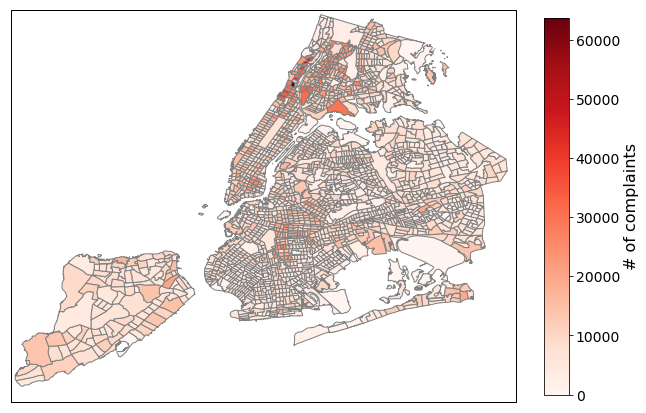

In [34]:
%matplotlib inline
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(10, 10),
                       subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], 
              ccrs.Geodetic())
for _, row in tracts.iterrows():
    color = cmap(norm(row['complaint_count']))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],
                          facecolor=color, edgecolor='grey')
    
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("# of complaints" , fontsize=16)